In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import json
import requests

In [19]:
from tqdm import tqdm

In [8]:
URL = "https://www.federalregister.gov/developers/api/v1"

r = requests.get(URL)
print(r, r.status_code, r.ok)

print(r.content[:100])

<Response [200]> 200 True
b'<!DOCTYPE html><html><head><base href="/developers/api/"><title>Federal Register API API Documentati'


In [16]:
sample_url = "https://www.federalregister.gov/api/v1/documents/2018-21106.json?fields%5B%5D=agencies"

r = requests.get(sample_url)
print(r, r.status_code, r.ok)

print(r.json())
print()
print(r.json()['agencies'][0]['raw_name'])

<Response [200]> 200 True
{'agencies': [{'raw_name': 'DEPARTMENT OF HOMELAND SECURITY', 'name': 'Homeland Security Department', 'id': 227, 'url': 'https://www.federalregister.gov/agencies/homeland-security-department', 'json_url': 'https://www.federalregister.gov/api/v1/agencies/227.json', 'parent_id': None, 'slug': 'homeland-security-department'}]}

DEPARTMENT OF HOMELAND SECURITY


In [83]:
document_id = '2018-21106'
return_format = 'json'

url = f"https://www.federalregister.gov/api/v1/documents/{document_id}.{return_format}"
payload = {'fields[]':['agencies','docket_id']}
print(url, params)

r = requests.get(url, params=payload)
print(r.request.body)
print(r, r.status_code, r.ok)

print(r.json())
print()
print(r.json().keys())


https://www.federalregister.gov/api/v1/documents/2018-21106.json {'fields': ['agencies']}
None
<Response [200]> 200 True
{'agencies': [{'raw_name': 'DEPARTMENT OF HOMELAND SECURITY', 'name': 'Homeland Security Department', 'id': 227, 'url': 'https://www.federalregister.gov/agencies/homeland-security-department', 'json_url': 'https://www.federalregister.gov/api/v1/agencies/227.json', 'parent_id': None, 'slug': 'homeland-security-department'}], 'docket_id': 'CIS No. 2499-10'}

dict_keys(['agencies', 'docket_id'])


In [79]:
#url = 'https://www.federalregister.gov/api/v1/documents.json?per_page=20&order=newest'

url = 'https://www.federalregister.gov/api/v1/documents.json'
payload = {
    'per_page':20,
    'order':'newest',
    'conditions[term]': 'fisheries',
    'page':15,
}
print(url, payload)

r = requests.get(url,params=payload)
print(r, r.status_code, r.ok)

if not r.ok:
    print(r.content)


#print(r.json())
print()
print(r.json().keys())
print(len(r.json()['results']))

res = r.json()['results']
print([x['title'] for x in res])

https://www.federalregister.gov/api/v1/documents.json {'per_page': 20, 'order': 'newest', 'conditions[term]': 'fisheries', 'page': 15}
<Response [200]> 200 True

dict_keys(['count', 'description', 'total_pages', 'next_page_url', 'previous_page_url', 'results'])
20
['New England Fishery Management Council; Public Meeting', 'Atlantic Highly Migratory Species; Commercial Aggregated Large Coastal Shark and Hammerhead Shark Management Group in the Atlantic Region; Retention Limit Adjustment', 'Submission for OMB Review; Comment Request', 'Nominations to the Marine Mammal Scientific Review Groups', 'Erie Boulevard Hydropower, L.P; Notice of Intent To File License Application, Filing of Pre-Application Document, and Approving Use of the Traditional Licensing Process', 'Columbia River Treaty Negotiations With Canada', 'Submission for OMB Review; Comment Request', 'International Cooperation on Harmonisation of Technical Requirements for Registration of Veterinary Medicinal Products; Studies To 

In [21]:
url = 'https://www.federalregister.gov/api/v1/documents.json'

term = 'visa'
per_page = 100


# Count the number of documents
payload = {'conditions[term]': term, 'per_page':per_page,}
r = requests.get(url,params=payload)

n_documents = r.json()['count']
n_pages = r.json()['total_pages']

data = []

for n in tqdm(range(n_pages)):
    payload = {
        'per_page':per_page,
        'order':'newest',
        'conditions[term]': term,
        'page':n+1,
    }
        
    r = requests.get(url,params=payload)
    
    res = r.json()['results']
    data.extend(res)
    
    #print(res[0])    
    #print([x['title'][:50] for x in res[:5]])

100%|██████████| 50/50 [02:15<00:00,  2.34s/it]


In [8]:
df = pd.DataFrame(data).set_index('document_number')
df.to_csv('lyme_example.csv')
print(len(df))
df

382


,abstract,agencies,excerpts,html_url,pdf_url,public_inspection_pdf_url,publication_date,title,type
document_number,,,,,,,,,
2019-20736,This final rule reforms Medicare regulations t...,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,&#8230; patients with conditions such as <sp...,https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-09...,https://s3.amazonaws.com/public-inspection.fed...,2019-09-30,Medicare and Medicaid Programs; Regulatory Pro...,Rule
2019-17288,None,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,&#8230; the information collection request t...,https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-08...,https://s3.amazonaws.com/public-inspection.fed...,2019-08-13,Agency Forms Undergoing Paperwork Reduction Ac...,Notice
2019-16954,The Federal Trade Commission (``FTC'' or ``Com...,"[{'raw_name': 'FEDERAL TRADE COMMISSION', 'nam...",&#8230; \n \n FTC11H1028 \n \n LUTHRA &amp; ...,https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-08...,https://s3.amazonaws.com/public-inspection.fed...,2019-08-08,Request for Contractor Submission of Final Inv...,Notice
2019-12682,This document amends the Department of Veteran...,[{'raw_name': 'DEPARTMENT OF VETERANS AFFAIRS'...,"&#8230; diagnostic methods, specifically for...",https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-06...,https://s3.amazonaws.com/public-inspection.fed...,2019-06-18,Schedule for Rating Disabilities; Infectious D...,Rule
2019-12648,None,"[{'raw_name': 'DEPARTMENT OF JUSTICE', 'name':...","&#8230; ., Gaborone, BOTSWANA; FiberQA LLC, O...",https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-06...,https://s3.amazonaws.com/public-inspection.fed...,2019-06-17,Notice Pursuant to the National Cooperative Re...,Notice
2019-12230,The Coast Guard will enforce certain safety zo...,[{'raw_name': 'DEPARTMENT OF HOMELAND SECURITY...,"&#8230; . on July 13, 2019. \n 4. <span class...",https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-06...,https://s3.amazonaws.com/public-inspection.fed...,2019-06-11,Safety Zones; Annual Events in the Captain of ...,Rule
2019-11647,The Centers for Disease Control and Prevention...,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,&#8230; proposed information collection proj...,https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-06...,https://s3.amazonaws.com/public-inspection.fed...,2019-06-05,Proposed Data Collection Submitted for Public ...,Notice
2019-07535,Notice is hereby given that permits or permit ...,"[{'raw_name': 'DEPARTMENT OF COMMERCE', 'name'...","&#8230; , P.O. Box 719, Old <span class=""matc...",https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-04...,https://s3.amazonaws.com/public-inspection.fed...,2019-04-16,Marine Mammals and Endangered Species,Notice
2019-04420,"We, the U.S. Fish and Wildlife Service (Servic...","[{'raw_name': 'DEPARTMENT OF THE INTERIOR', 'n...","&#8230; et al. 1995, p. 421). \n <span class...",https://www.federalregister.gov/documents/2019...,https://www.govinfo.gov/content/pkg/FR-2019-03...,https://s3.amazonaws.com/public-inspection.fed...,2019-03-15,Endangered and Threatened Wildlife and Plants;...,Proposed Rule


In [14]:
print(f"Fraction with abstracts", 1 - df.abstract.isnull().mean())
ab = df.abstract.copy().dropna()
ab.str.len()

Fraction with abstracts 0.7984293193717278


document_number
2019-20736    1050
2019-16954     583
2019-12682     485
2019-12230     441
2019-11647     957
2019-07535     198
2019-04420     836
2019-00636     507
2018-25955     245
2018-23517     384
2018-17776     437
2018-15051     372
2018-12105    1017
2018-11872     410
2018-08206     479
2018-06608     191
2018-01127     648
2018-01149     932
2017-26531     464
2017-23489     672
2017-11018     756
2017-07000     231
2017-01229     843
2017-00956     225
2016-31848     323
2016-30332    1150
2016-30063     983
2016-27546    1014
2016-26668     706
2016-23934     306
              ... 
96-6960        289
96-5240        711
96-1084        171
X95-11208      703
95-29187       864
95-27107       404
95-26379      1006
95-23160       361
95-23141       171
95-19219       439
95-11653      1247
95-10922      1032
95-10156      1402
95-7355       2062
95-5974        468
95-04418       779
94-31174      1211
94-31054      1398
94-29916       628
94-29217       379
94-27472       

In [18]:
ab.str.len().describe()

count     305.000000
mean      804.550820
std       624.107177
min        57.000000
25%       394.000000
50%       600.000000
75%      1017.000000
max      4755.000000
Name: abstract, dtype: float64

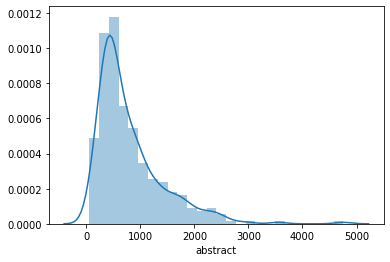

In [17]:
sns.distplot(ab.str.len())

In [25]:
# Set Parameters from Federal Register for Get Requests
URL = "https://www.federalregister.gov/developers/api/v1"
PARAMS = {
    'format': json,
    fields['agency_names'],
    'per_page': 1000,
    'order': 'newest'
    }

SyntaxError: invalid syntax (<ipython-input-25-5c49f46f1d30>, line 5)

In [23]:
# sending get request and saving the response as response object 
r = requests.get(url = URL, params = PARAMS) 
  
# extracting data in json format 
data = r.json() 
print(r.status_code) #Print Status Code. 200 = Success!

NameError: name 'URL' is not defined

In [13]:
print(response.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)